In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the datas

In [5]:
train_data = pd.read_csv('C:\\Users\\HP\\Downloads\\Train.csv')
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
train_data.shape

(8523, 12)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
# Checking Null values in Train dataset

In [10]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- Item_Weight has 1463 null values
- Outlet_Size has 2410 null values


- Here I am not dropping the null values, instead I am imputing mean value(ie; average value) of the weight into Item_Weight column
- And imputing mode value(most repeated value) to Outlet_Size column

In [11]:
train_data['Item_Weight'].mean()

12.857645184135976

In [12]:
train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(), inplace=True)

In [17]:
mode=train_data['Outlet_Size'].mode()[0]

In [18]:
train_data['Outlet_Size'].fillna(mode, inplace=True)

In [19]:
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [42]:
train_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

- here the low fat is mentioned in 3 ways and regular fat is mentioned in 2 ways. We need to change that

In [44]:
train_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

- Now we have dealt with the missing values

### EDA

In [20]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [29]:
# Checking all the numerical columns

#### Item_weight Distribution

C:\Users\HP\AppData\Local\Temp\ipykernel_7420\3936217347.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['Item_Weight'])


<function matplotlib.pyplot.show(close=None, block=None)>

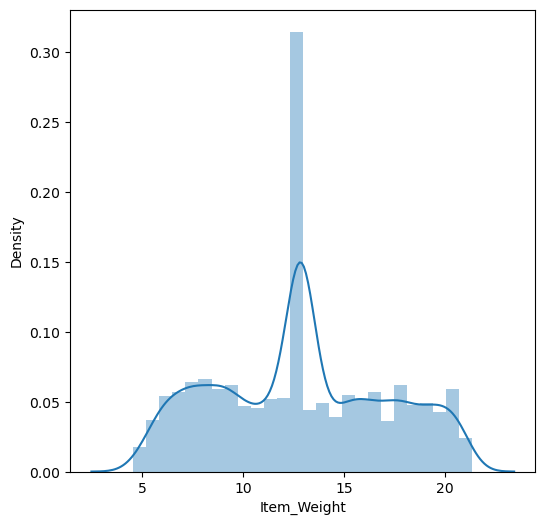

In [23]:
plt.figure(figsize=(6,6))
sns.distplot(train_data['Item_Weight'])
plt.show

C:\Users\HP\AppData\Local\Temp\ipykernel_7420\1742399395.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['Item_Visibility'])


<function matplotlib.pyplot.show(close=None, block=None)>

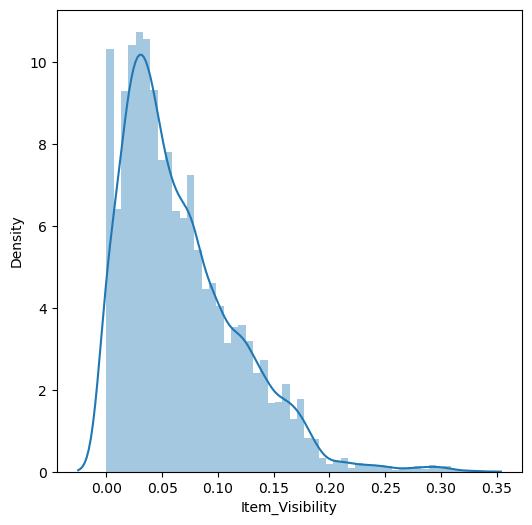

In [25]:
plt.figure(figsize=(6,6))
sns.distplot(train_data['Item_Visibility'])
plt.show

C:\Users\HP\AppData\Local\Temp\ipykernel_7420\1930223887.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['Item_MRP'])


<function matplotlib.pyplot.show(close=None, block=None)>

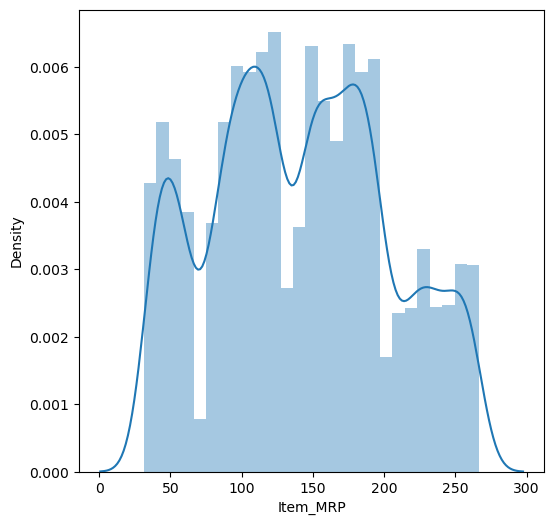

In [26]:
plt.figure(figsize=(6,6))
sns.distplot(train_data['Item_MRP'])
plt.show

C:\Users\HP\AppData\Local\Temp\ipykernel_7420\967051500.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['Item_Outlet_Sales'])


<function matplotlib.pyplot.show(close=None, block=None)>

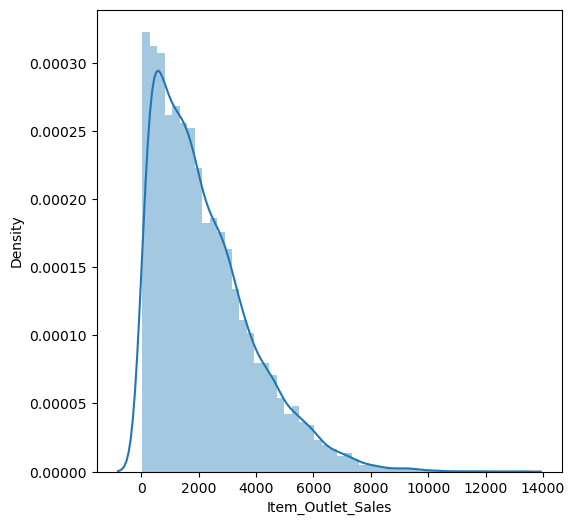

In [27]:
plt.figure(figsize=(6,6))
sns.distplot(train_data['Item_Outlet_Sales'])
plt.show

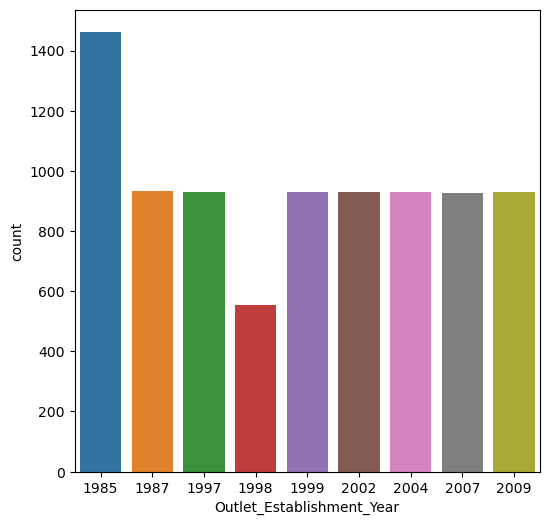

In [28]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=train_data)
plt.show()

In [30]:
# Checking all the categorical columns

In [31]:
train_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

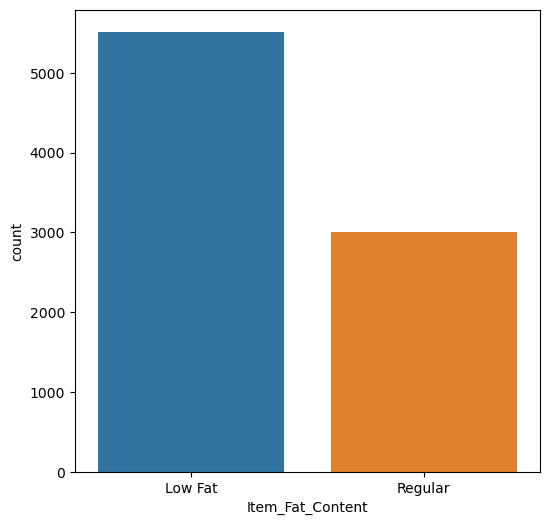

In [45]:
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=train_data)
plt.show()

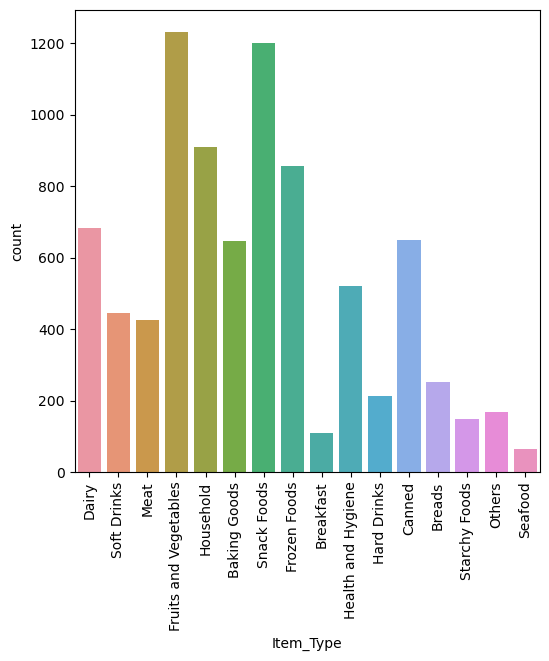

In [36]:
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Type', data=train_data)
plt.xticks(rotation=90)
plt.show()

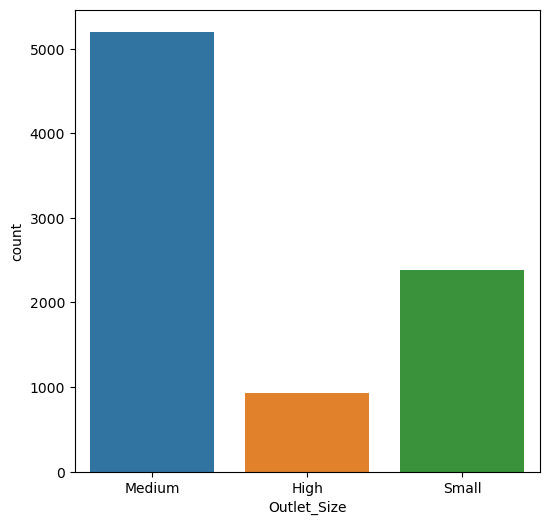

In [37]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=train_data)
plt.show()

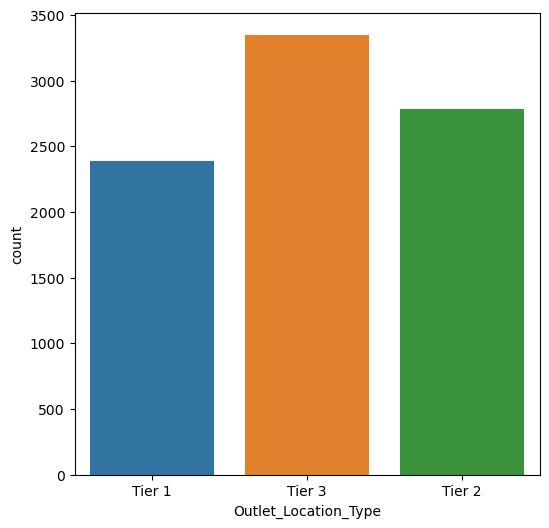

In [38]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Location_Type', data=train_data)
plt.show()

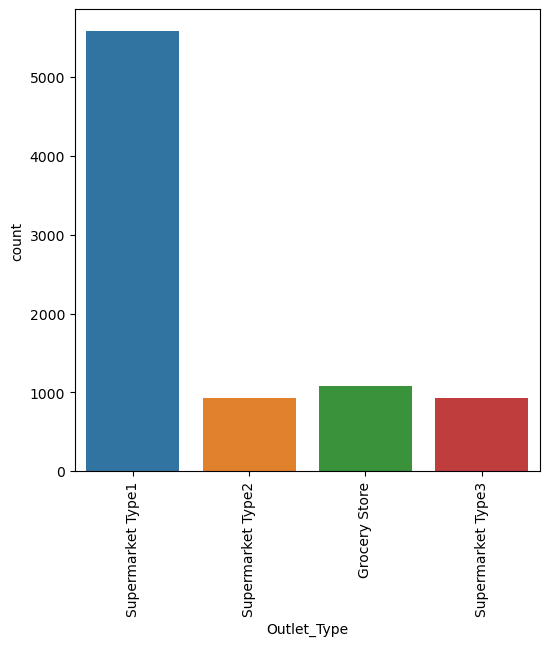

In [40]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Type', data=train_data)
plt.xticks(rotation=90)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

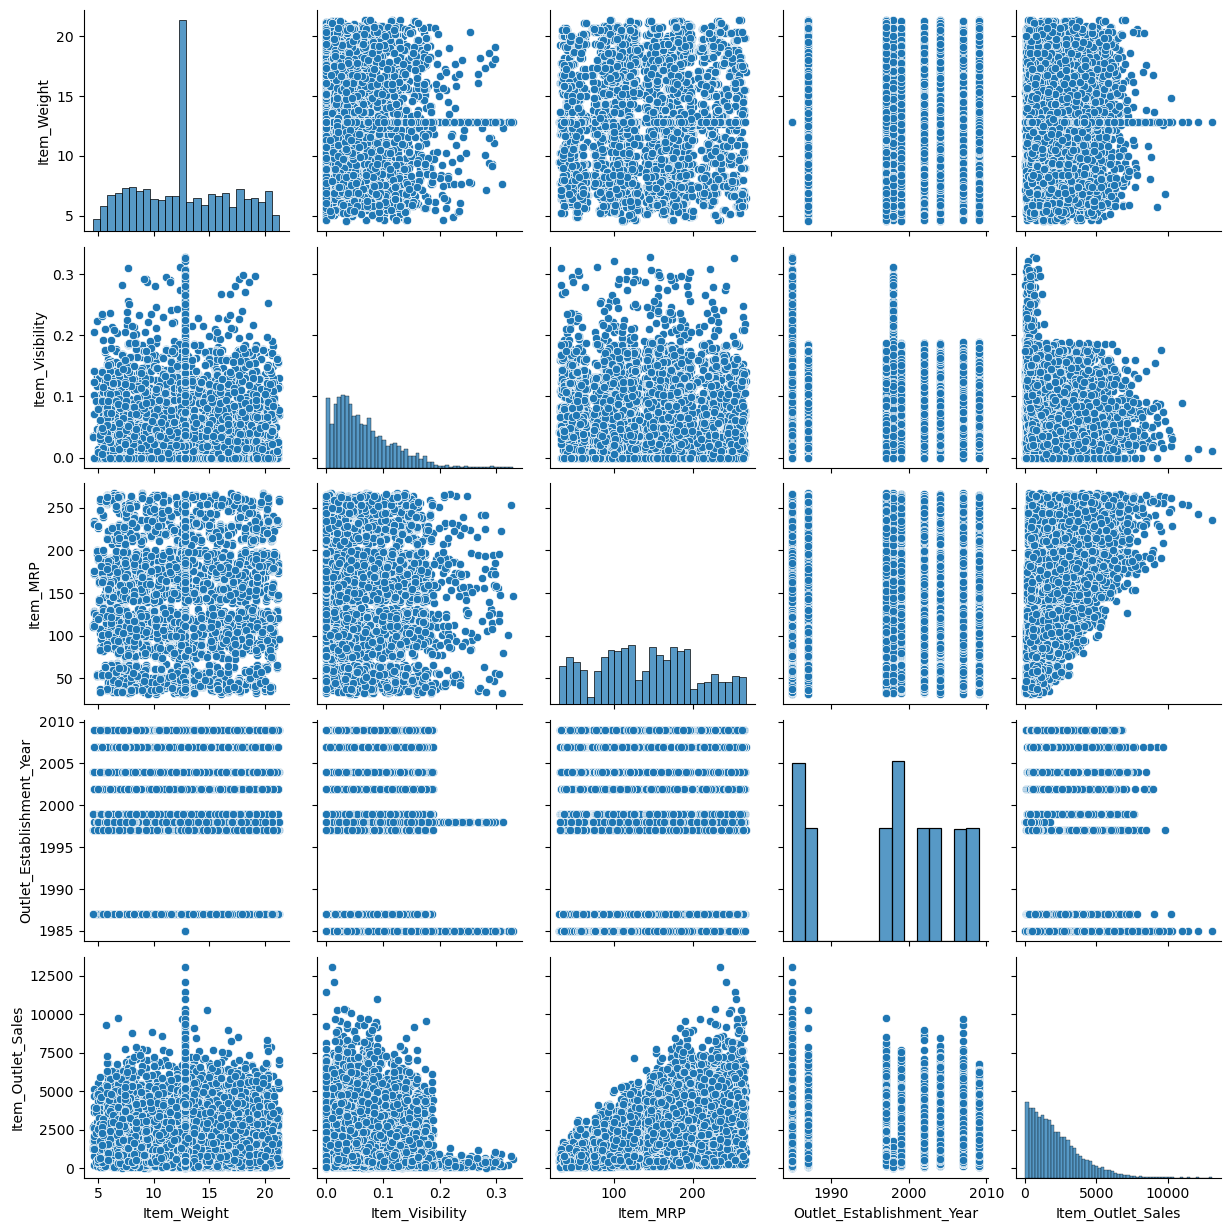

In [46]:
sns.pairplot(train_data)
plt.show

In [51]:
corr=train_data.corr()
corr

C:\Users\HP\AppData\Local\Temp\ipykernel_7420\3730383149.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=train_data.corr()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


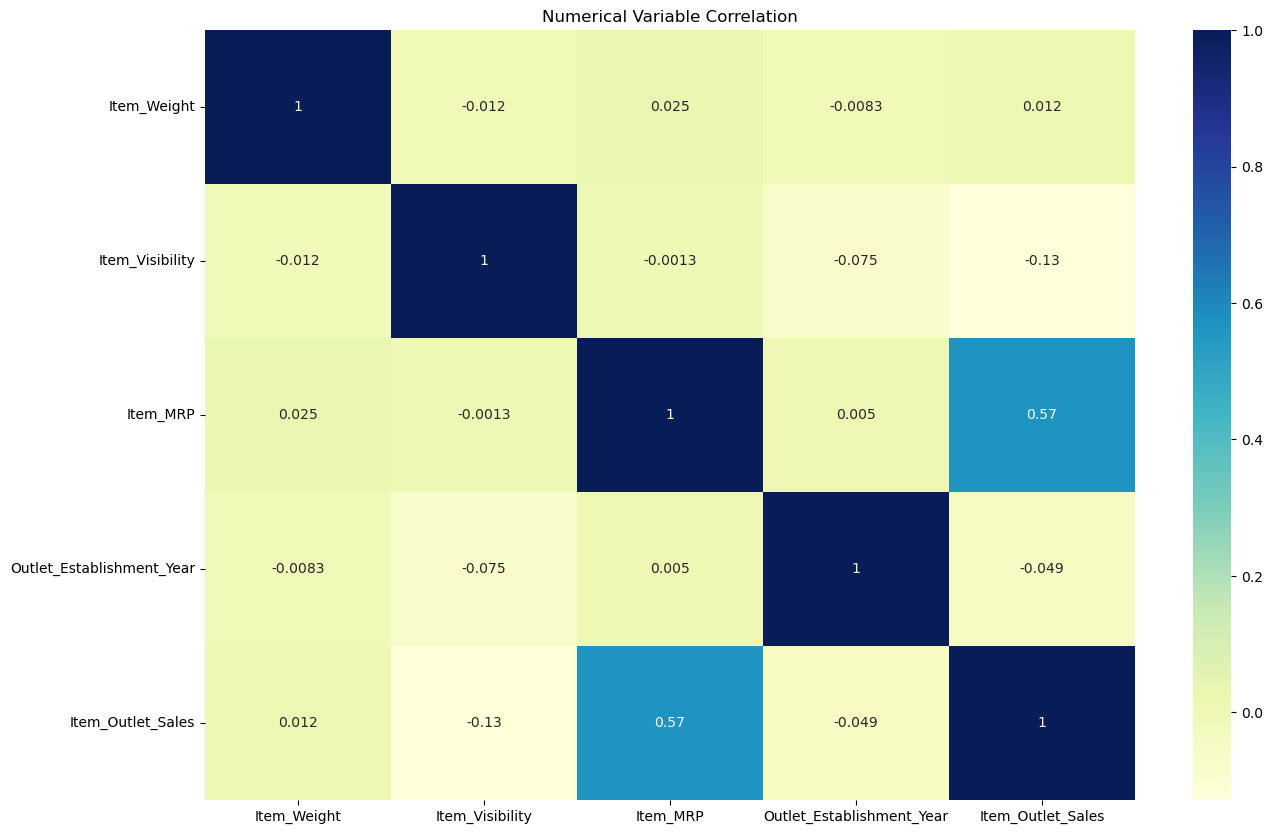

In [52]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.title('Numerical Variable Correlation')
plt.show()

In [53]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [58]:
# We need to transform the categorical values into numerical type using LabelEncoder

In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
encoder=LabelEncoder()

In [61]:
train_data['Item_Identifier']=encoder.fit_transform(train_data['Item_Identifier'])
train_data['Item_Fat_Content']=encoder.fit_transform(train_data['Item_Fat_Content'])
train_data['Item_Type']=encoder.fit_transform(train_data['Item_Type'])
train_data['Outlet_Identifier']=encoder.fit_transform(train_data['Outlet_Identifier'])
train_data['Outlet_Size']=encoder.fit_transform(train_data['Outlet_Size'])
train_data['Outlet_Location_Type']=encoder.fit_transform(train_data['Outlet_Location_Type'])
train_data['Outlet_Type']=encoder.fit_transform(train_data['Outlet_Type'])


In [63]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [64]:
x=train_data.drop(['Item_Outlet_Sales'],axis=1)
y=train_data['Item_Outlet_Sales']

In [65]:
x.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1


In [66]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [67]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Train - Test Splitting

In [75]:
train_data_encoded = pd.get_dummies(train_data)
X = train_data_encoded.drop('Item_Outlet_Sales', axis=1)  # Features
y = train_data_encoded['Item_Outlet_Sales']  # Target

In [79]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=2)


In [80]:
print(x.shape,x_train.shape,x_test.shape)

(8523, 11) (6818, 11) (1705, 11)


## Rescaling

In [83]:
Scaler=MinMaxScaler()

In [86]:
num_vars= ['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']
x_train[num_vars] = Scaler.fit_transform(x_train[num_vars])
x_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
7173,627,0.431378,1,0.174857,10,0.503175,8,0.5,2,0,1
3315,996,0.494352,0,0.000000,0,0.291626,5,0.0,1,2,3
5932,1127,0.188747,0,0.145506,3,0.924472,8,0.5,2,0,1
7872,439,0.353974,0,0.160039,5,0.247211,8,0.5,2,0,1
5946,993,0.494352,1,0.718227,13,0.062236,4,0.0,2,0,0


In [87]:
x_train_num=x_train[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']]

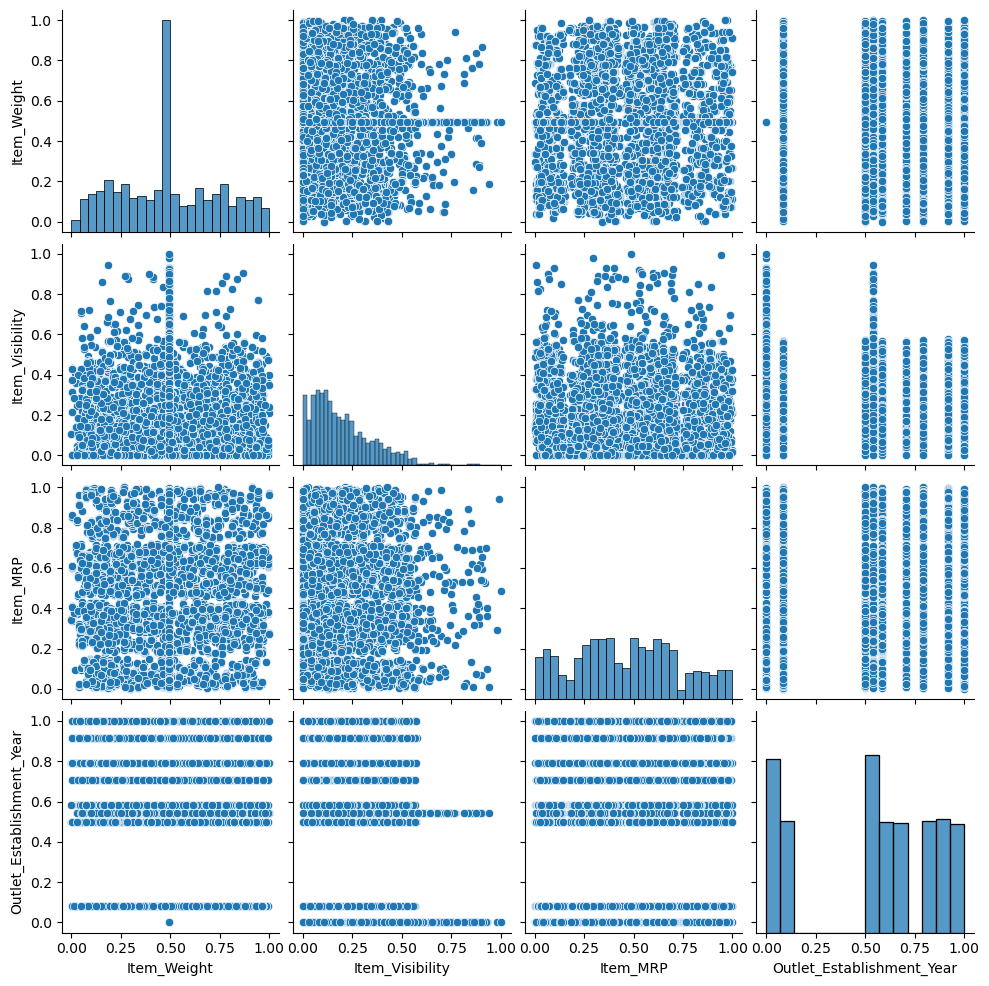

In [89]:
sns.pairplot(x_train_num)
plt.show()

In [90]:
x_train_num.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Item_Weight,1.000000,-0.014757,0.025922,-0.014540
Item_Visibility,-0.014757,1.000000,-0.003216,-0.075744
Item_MRP,0.025922,-0.003216,1.000000,0.002996
Outlet_Establishment_Year,-0.014540,-0.075744,0.002996,1.000000


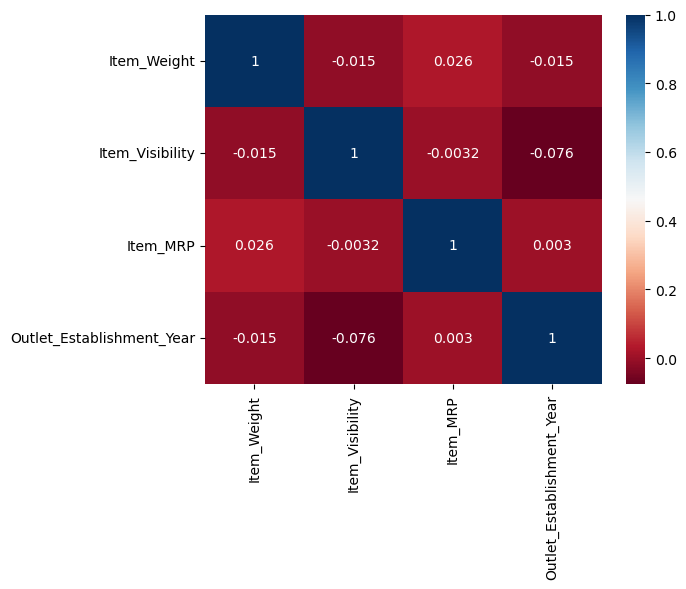

In [91]:
sns.heatmap(x_train_num.corr(),annot=True,cmap='RdBu')
plt.show()

## Model Building

In [92]:
# Creating an instance of LinearRegression
lm=LinearRegression()

#fitting model with x_train and y_train

lm.fit(x_train, y_train)

# Creating RFE instance on fitted lm

rfe = RFE(estimator=lm, n_features_to_select=15)

# Converting rfe to fitted rfe

rfe=rfe.fit(x_train, y_train)

In [93]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('Item_Identifier', True, 1),
 ('Item_Weight', True, 1),
 ('Item_Fat_Content', True, 1),
 ('Item_Visibility', True, 1),
 ('Item_Type', True, 1),
 ('Item_MRP', True, 1),
 ('Outlet_Identifier', True, 1),
 ('Outlet_Establishment_Year', True, 1),
 ('Outlet_Size', True, 1),
 ('Outlet_Location_Type', True, 1),
 ('Outlet_Type', True, 1)]

In [94]:
col=x_train.columns[rfe.support_]
col

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [95]:
x_train.columns[~rfe.support_]

Index([], dtype='object')

In [96]:
#Creating x_train dataframe with RFE selected variable
x_train_rfe=x_train[col]

### Building Linear Model Using stats model

In [97]:
# Model 1

VIF Check

In [98]:
def vif_table(dataframe):
    vif = pd.DataFrame() 
    vif['Feature'] = dataframe.columns
    vif['VIF'] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by="VIF", ascending=False)
    return vif


result = vif_table(x_train_rfe)
print(result)

                      Feature    VIF
6           Outlet_Identifier  10.13
9        Outlet_Location_Type   9.17
10                Outlet_Type   7.77
8                 Outlet_Size   6.90
1                 Item_Weight   4.50
5                    Item_MRP   3.90
0             Item_Identifier   3.81
4                   Item_Type   3.78
7   Outlet_Establishment_Year   3.56
3             Item_Visibility   2.66
2            Item_Fat_Content   1.56


In [100]:
x_train_lm1=sm.add_constant(x_train_rfe)
lr1=sm.OLS(y_train,x_train_lm1).fit()
lr1.params

const                        -131.756531
Item_Identifier                -0.005431
Item_Weight                   -60.526739
Item_Fat_Content               29.999821
Item_Visibility              -415.987748
Item_Type                       0.291858
Item_MRP                     3673.808813
Outlet_Identifier              56.536482
Outlet_Establishment_Year      45.926224
Outlet_Size                  -336.912905
Outlet_Location_Type         -226.853273
Outlet_Type                   878.512453
dtype: float64

In [102]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     654.5
Date:                Wed, 05 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:27:15   Log-Likelihood:                -57902.
No. Observations:                6818   AIC:                         1.158e+05
Df Residuals:                    6806   BIC:                         1.159e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      -131.7565    100.770     -1.307      0.191    -329.297      65.784
Item_Identifier              -0.0054      0.032     -0.169      0.866      -0.068       0.058
Item_Weight                 -60.5267     56.893     -1.064      0.287    -172.056      51.002
Item_Fat_Content             29.9998     30.585      0.981      0.327     -29.956      89.955
Item_Visibility            -415.9877     94.127     -4.419      0.000    -600.505    -231.470
Item_Type                     0.2919      3.439      0.085      0.932      -6.450       7.034
Item_MRP                   3673.8088     54.202     67.780      0.000    3567.556    3780.062
Outlet_Identifier            56.5365     10.216      5.534      0.000      36.510      76.563
Outlet_Establishment_Year    45.9262     42.627      1.077      0.281     -37.635     129.488
Outlet_Size                -336.9129     31.181    -10.805      0.000    -398.038    -275.788
Outlet_Location_Type       -226.8533     42.424     -5.347      0.000    -310.018    -143.689
Outlet_Type                 878.5125     29.220     30.066      0.000     821.233     935.792
==============================================================================
Omnibus:                      708.841   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1570.391
Skew:                           0.642   Prob(JB):                         0.00
Kurtosis:                       4.970   Cond. No.                     7.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- The VIF values of Outlet_Identifier is high so that we can drop and check whether the VIF values of other factors are decreasing or not

In [105]:
x_train_new=x_train_rfe.drop(['Outlet_Identifier'], axis=1)

In [106]:
def vif_table(dataframe):
    vif = pd.DataFrame() 
    vif['Feature'] = dataframe.columns
    vif['VIF'] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by="VIF", ascending=False)
    return vif


result = vif_table(x_train_new)
print(result)

                     Feature   VIF
7                Outlet_Size  5.99
8       Outlet_Location_Type  4.88
9                Outlet_Type  4.34
1                Item_Weight  4.33
5                   Item_MRP  3.78
0            Item_Identifier  3.68
4                  Item_Type  3.63
6  Outlet_Establishment_Year  3.39
3            Item_Visibility  2.63
2           Item_Fat_Content  1.53


In [107]:
x_train_lm2=sm.add_constant(x_train_new)
lr2=sm.OLS(y_train,x_train_lm2).fit()

In [108]:
lr2.params

const                         195.241438
Item_Identifier                -0.006246
Item_Weight                   -61.399062
Item_Fat_Content               30.283257
Item_Visibility              -445.363323
Item_Type                       0.504930
Item_MRP                     3675.286174
Outlet_Establishment_Year      70.616745
Outlet_Size                  -331.385131
Outlet_Location_Type         -415.660529
Outlet_Type                   990.405658
dtype: float64

In [109]:
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     713.8
Date:                Wed, 05 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:30:48   Log-Likelihood:                -57917.
No. Observations:                6818   AIC:                         1.159e+05
Df Residuals:                    6807   BIC:                         1.159e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       195.2414     81.807      2.387      0.017      34.875     355.608
Item_Identifier              -0.0062      0.032     -0.194      0.846      -0.069       0.057
Item_Weight                 -61.3991     57.017     -1.077      0.282    -173.170      50.372
Item_Fat_Content             30.2833     30.651      0.988      0.323     -29.802      90.369
Item_Visibility            -445.3633     94.181     -4.729      0.000    -629.988    -260.739
Item_Type                     0.5049      3.446      0.147      0.884      -6.251       7.261
Item_MRP                   3675.2862     54.319     67.661      0.000    3568.804    3781.769
Outlet_Establishment_Year    70.6167     42.485      1.662      0.097     -12.667     153.900
Outlet_Size                -331.3851     31.233    -10.610      0.000    -392.611    -270.159
Outlet_Location_Type       -415.6605     25.271    -16.448      0.000    -465.201    -366.121
Outlet_Type                 990.4057     21.141     46.848      0.000     948.963    1031.849
==============================================================================
Omnibus:                      685.203   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1498.268
Skew:                           0.627   Prob(JB):                         0.00
Kurtosis:                       4.924   Cond. No.                     6.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- The VIF value of the Outlet_Size is above acceptable range(5) and the p-values of Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Outlet_Establishment_Year are above the acceptable range(0.05)

- By our logic we can assume that the Item_Identifier and Outlet_Establishment_Year will not affect the sales. So we can drop that two column and check once again

In [111]:
x_train_new2=x_train_new.drop(['Item_Identifier','Outlet_Establishment_Year'], axis=1)


In [112]:
def vif_table(dataframe):
    vif = pd.DataFrame() 
    vif['Feature'] = dataframe.columns
    vif['VIF'] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by="VIF", ascending=False)
    return vif


result = vif_table(x_train_new2)
print(result)

                Feature   VIF
5           Outlet_Size  4.72
6  Outlet_Location_Type  4.48
7           Outlet_Type  4.29
0           Item_Weight  4.20
4              Item_MRP  3.71
3             Item_Type  3.58
2       Item_Visibility  2.62
1      Item_Fat_Content  1.52


In [113]:
x_train_lm3=sm.add_constant(x_train_new2)
lr3=sm.OLS(y_train,x_train_lm3).fit()

In [114]:
lr3.params

const                    220.726856
Item_Weight              -63.307733
Item_Fat_Content          31.650282
Item_Visibility         -463.062155
Item_Type                  0.565986
Item_MRP                3675.477766
Outlet_Size             -321.186347
Outlet_Location_Type    -411.723615
Outlet_Type              985.873328
dtype: float64

In [115]:
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     891.8
Date:                Wed, 05 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:37:53   Log-Likelihood:                -57919.
No. Observations:                6818   AIC:                         1.159e+05
Df Residuals:                    6809   BIC:                         1.159e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  220.7269     75.495      2.924      0.003      72.734     368.720
Item_Weight            -63.3077     56.961     -1.111      0.266    -174.969      48.354
Item_Fat_Content        31.6503     30.439      1.040      0.298     -28.019      91.320
Item_Visibility       -463.0622     93.526     -4.951      0.000    -646.402    -279.722
Item_Type                0.5660      3.444      0.164      0.869      -6.185       7.317
Item_MRP              3675.4778     54.319     67.665      0.000    3568.996    3781.959
Outlet_Size           -321.1863     30.608    -10.494      0.000    -381.187    -261.185
Outlet_Location_Type  -411.7236     25.148    -16.372      0.000    -461.022    -362.426
Outlet_Type            985.8733     20.962     47.032      0.000     944.781    1026.965
==============================================================================
Omnibus:                      676.946   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1469.035
Skew:                           0.623   Prob(JB):                         0.00
Kurtosis:                       4.902   Cond. No.                         59.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- all the VIF values are below 5, which is acceptable
- p-value of Item_Weight,Item_Fat_Content & Item_Type are higher than 0.05
- first we can drop Item_Type column and re check

In [128]:
x_train_new3=x_train_new2.drop(['Item_Type'], axis=1)

In [129]:
def vif_table(dataframe):
    vif = pd.DataFrame() 
    vif['Feature'] = dataframe.columns
    vif['VIF'] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by="VIF", ascending=False)
    return vif


result = vif_table(x_train_new3)
print(result)

                Feature   VIF
4           Outlet_Size  4.31
5  Outlet_Location_Type  4.30
6           Outlet_Type  4.28
0           Item_Weight  4.07
3              Item_MRP  3.62
2       Item_Visibility  2.61
1      Item_Fat_Content  1.51


In [130]:
x_train_lm4=sm.add_constant(x_train_new3)
lr4=sm.OLS(y_train,x_train_lm4).fit()

In [131]:
lr4.params

const                    224.900252
Item_Weight              -63.032669
Item_Fat_Content          30.939001
Item_Visibility         -463.507316
Item_MRP                3675.750938
Outlet_Size             -321.176221
Outlet_Location_Type    -411.702203
Outlet_Type              985.838279
dtype: float64

In [132]:
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     1019.
Date:                Wed, 05 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:54:48   Log-Likelihood:                -57919.
No. Observations:                6818   AIC:                         1.159e+05
Df Residuals:                    6810   BIC:                         1.159e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  224.9003     71.091      3.164      0.002      85.540     364.260
Item_Weight            -63.0327     56.932     -1.107      0.268    -174.638      48.573
Item_Fat_Content        30.9390     30.127      1.027      0.304     -28.120      89.998
Item_Visibility       -463.5073     93.480     -4.958      0.000    -646.757    -280.257
Item_MRP              3675.7509     54.289     67.707      0.000    3569.327    3782.175
Outlet_Size           -321.1762     30.606    -10.494      0.000    -381.173    -261.180
Outlet_Location_Type  -411.7022     25.146    -16.373      0.000    -460.996    -362.408
Outlet_Type            985.8383     20.959     47.036      0.000     944.751    1026.925
==============================================================================
Omnibus:                      677.127   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1469.300
Skew:                           0.623   Prob(JB):                         0.00
Kurtosis:                       4.902   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- The p-values of Item_Weight & Item_Fat_Content are still high. 
- I am goint to drop Item_Fat_Content column, because if the fat content is high people will only buy low quantity or weight

In [133]:
x_train_new4=x_train_new3.drop(['Item_Fat_Content'], axis=1)

In [134]:
def vif_table(dataframe):
    vif = pd.DataFrame() 
    vif['Feature'] = dataframe.columns
    vif['VIF'] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by="VIF", ascending=False)
    return vif


result = vif_table(x_train_new4)
print(result)

                Feature   VIF
5           Outlet_Type  4.28
4  Outlet_Location_Type  4.27
3           Outlet_Size  4.26
0           Item_Weight  4.07
2              Item_MRP  3.61
1       Item_Visibility  2.59


In [135]:
x_train_lm5=sm.add_constant(x_train_new4)
lr5=sm.OLS(y_train,x_train_lm5).fit()

In [136]:
lr5.params

const                    235.489285
Item_Weight              -64.295927
Item_Visibility         -458.240284
Item_MRP                3676.535607
Outlet_Size             -321.751224
Outlet_Location_Type    -411.922373
Outlet_Type              986.125141
dtype: float64

In [137]:
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     1189.
Date:                Wed, 05 Jun 2024   Prob (F-statistic):               0.00
Time:                        18:03:15   Log-Likelihood:                -57919.
No. Observations:                6818   AIC:                         1.159e+05
Df Residuals:                    6811   BIC:                         1.159e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  235.4893     70.339      3.348      0.001      97.602     373.376
Item_Weight            -64.2959     56.919     -1.130      0.259    -175.876      47.284
Item_Visibility       -458.2403     93.340     -4.909      0.000    -641.215    -275.265
Item_MRP              3676.5356     54.284     67.728      0.000    3570.122    3782.949
Outlet_Size           -321.7512     30.601    -10.515      0.000    -381.738    -261.765
Outlet_Location_Type  -411.9224     25.145    -16.382      0.000    -461.215    -362.630
Outlet_Type            986.1251     20.958     47.053      0.000     945.042    1027.209
==============================================================================
Omnibus:                      678.180   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1471.523
Skew:                           0.624   Prob(JB):                         0.00
Kurtosis:                       4.903   Cond. No.                         16.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- still Item_Weight's p-value is high we are dropping  that column too

In [138]:
x_train_new5=x_train_new4.drop(['Item_Weight'], axis=1)

In [139]:
def vif_table(dataframe):
    vif = pd.DataFrame() 
    vif['Feature'] = dataframe.columns
    vif['VIF'] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by="VIF", ascending=False)
    return vif


result = vif_table(x_train_new5)
print(result)

                Feature   VIF
4           Outlet_Type  4.26
3  Outlet_Location_Type  3.97
2           Outlet_Size  3.60
1              Item_MRP  3.47
0       Item_Visibility  2.56


In [140]:
x_train_lm6=sm.add_constant(x_train_new5)
lr6=sm.OLS(y_train,x_train_lm6).fit()

In [141]:
lr6.params

const                    204.085708
Item_Visibility         -456.645453
Item_MRP                3674.953330
Outlet_Size             -321.587171
Outlet_Location_Type    -412.139471
Outlet_Type              986.307156
dtype: float64

In [142]:
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     1427.
Date:                Wed, 05 Jun 2024   Prob (F-statistic):               0.00
Time:                        18:09:59   Log-Likelihood:                -57920.
No. Observations:                6818   AIC:                         1.159e+05
Df Residuals:                    6812   BIC:                         1.159e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  204.0857     64.613      3.159      0.002      77.423     330.748
Item_Visibility       -456.6455     93.331     -4.893      0.000    -639.603    -273.688
Item_MRP              3674.9533     54.267     67.720      0.000    3568.573    3781.334
Outlet_Size           -321.5872     30.601    -10.509      0.000    -381.574    -261.600
Outlet_Location_Type  -412.1395     25.145    -16.391      0.000    -461.431    -362.848
Outlet_Type            986.3072     20.957     47.062      0.000     945.224    1027.390
==============================================================================
Omnibus:                      679.205   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1472.781
Skew:                           0.625   Prob(JB):                         0.00
Kurtosis:                       4.903   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 - Now this model is good

Coefficient Values are

- const = 204.085708
- Item_Visibility = -456.645453
- Item_MRP = 3674.953330
- Outlet_Size = -321.587171
- Outlet_Location_Type = -412.139471
- Outlet_Type = 986.307156

### Equation of the best fitted line

Item_Outlet_Sales= 204.085708 - 456.645453(Item_Visibility)+ 3674.953330(Item_MRP)- 321.587171(Outlet_Size)- 412.139471(Outlet_Location_Type)+986.307156(Outlet_Type)

### RESIDUAL ANALYSIS

In [143]:
y_train_pred=lr6.predict(x_train_lm6)

C:\Users\HP\AppData\Local\Temp\ipykernel_7420\3332566260.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


<Axes: ylabel='Density'>

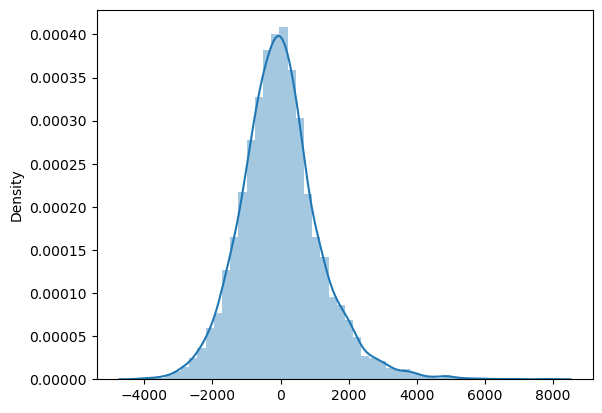

In [144]:
res=y_train - y_train_pred
sns.distplot(res)

In [145]:
# R-Squared value for train prediction
r2_score(y_train,y_train_pred)

0.5115005793918186

## Making predictions on test data set

In [146]:
num_vars= ['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']
x_test[num_vars] = Scaler.fit_transform(x_test[num_vars])
x_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1112,496,0.494352,0,0.320638,6,0.186516,5,0.000000,1,2,3
1751,382,0.452218,0,0.422533,5,0.914930,7,0.708333,1,1,1
7648,1207,0.074129,0,0.421811,4,0.239930,7,0.708333,1,1,1
7362,1415,0.740994,0,0.280908,8,0.398063,0,0.541667,1,2,0
5332,910,0.494352,0,0.030812,5,0.302258,4,0.000000,2,0,0


In [147]:
x_test.shape

(1705, 11)

In [149]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1705 entries, 1112 to 4433
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            1705 non-null   int32  
 1   Item_Weight                1705 non-null   float64
 2   Item_Fat_Content           1705 non-null   int32  
 3   Item_Visibility            1705 non-null   float64
 4   Item_Type                  1705 non-null   int32  
 5   Item_MRP                   1705 non-null   float64
 6   Outlet_Identifier          1705 non-null   int32  
 7   Outlet_Establishment_Year  1705 non-null   float64
 8   Outlet_Size                1705 non-null   int32  
 9   Outlet_Location_Type       1705 non-null   int32  
 10  Outlet_Type                1705 non-null   int32  
dtypes: float64(4), int32(7)
memory usage: 113.2 KB


In [150]:
x_test.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000
mean,779.345455,0.502758,0.364809,0.212037,7.218768,0.463789,4.756598,0.533920,1.162463,1.132551,1.228152
std,448.168643,0.249783,0.481518,0.167398,4.196005,0.265600,2.833194,0.349388,0.592400,0.815793,0.810816
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,401.000000,0.294433,0.000000,0.086247,4.000000,0.260148,2.000000,0.083333,1.000000,0.000000,1.000000
50%,786.000000,0.494352,0.000000,0.172596,6.000000,0.475917,5.000000,0.583333,1.000000,1.000000,1.000000
75%,1164.000000,0.687407,1.000000,0.302869,10.000000,0.652805,7.000000,0.791667,2.000000,2.000000,1.000000
max,1558.000000,1.000000,1.000000,1.000000,15.000000,1.000000,9.000000,1.000000,2.000000,2.000000,3.000000


In [154]:
col=x_test.columns[rfe.support_]
col

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [155]:
x_test_rfe=x_test[col]

In [156]:
x_test_rfe.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1112,496,0.494352,0,0.320638,6,0.186516,5,0.000000,1,2,3
1751,382,0.452218,0,0.422533,5,0.914930,7,0.708333,1,1,1
7648,1207,0.074129,0,0.421811,4,0.239930,7,0.708333,1,1,1
7362,1415,0.740994,0,0.280908,8,0.398063,0,0.541667,1,2,0
5332,910,0.494352,0,0.030812,5,0.302258,4,0.000000,2,0,0


In [157]:
x_test_rfe=x_test_rfe.drop(['Outlet_Identifier','Item_Identifier','Outlet_Establishment_Year','Item_Type','Item_Fat_Content','Item_Weight'],axis=1)


In [158]:
x_test_lm1=sm.add_constant(x_test_rfe)
lr_model=sm.OLS(y_test,x_test_lm1).fit()

In [159]:
lr_model.params

const                    326.728209
Item_Visibility         -566.529483
Item_MRP                3666.273545
Outlet_Size             -364.065915
Outlet_Location_Type    -458.552231
Outlet_Type             1035.426351
dtype: float64

In [160]:
y_test_pred=lr_model.predict(x_test_lm1)

In [161]:
res=y_test-y_test_pred

In [162]:
r2_score(y_test,y_test_pred)

0.4942250932596207

In [163]:
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.5115005793918186
0.4942250932596207


By comparing the R-Squared score of train and test data set, it is almost same

R-Squared score of train data set = 0.511

R-Squared score of test data set = 0.494